# Chapter 5: Lyrics -- Writing Words That Sing

## Learning Objectives

By the end of this chapter you will be able to:

1. Detect and classify **rhyme schemes** (ABAB, AABB, ABCB, etc.)
2. Count **syllables** in lyric lines
3. Find **rhyming words** using phonetic similarity
4. Analyze **lyric structure** across verses and choruses
5. Visualize rhyme schemes and stress patterns

---

## Why Lyrics Need Structure

Lyrics are not poetry set to music -- they are a distinct craft. Unlike poetry, lyrics must:

- Match the **rhythm** of the melody (see Chapter 4 on prosody)
- Work with **repetition** (choruses repeat, so the words must reward re-hearing)
- Be **immediately understandable** by ear (no time to re-read)
- Use **rhyme** to create predictability and satisfaction

Structure is the skeleton that holds lyrics together. The two most important structural tools are **rhyme scheme** and **syllable count**.

## Rhyme Schemes

A **rhyme scheme** describes which lines rhyme with which, using letters:

```
AABB    Couplets         Lines 1-2 rhyme, lines 3-4 rhyme
ABAB    Alternate        Lines 1-3 rhyme, lines 2-4 rhyme
ABCB    Common           Only lines 2-4 rhyme
ABBA    Enclosed         Lines 1-4 rhyme, lines 2-3 rhyme
AABA    Limerick-ish     Lines 1, 2, 4 rhyme; line 3 is free
```

Let's build a rhyme detector.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def get_ending(word: str, n_chars: int = 3) -> str:
    """Extract the ending of a word for rhyme comparison.
    
    This is a simplified approach. A proper implementation would use
    the CMU Pronouncing Dictionary for phoneme-based matching.
    """
    clean = word.lower().strip(".,!?;:\"'()")
    return clean[-n_chars:] if len(clean) >= n_chars else clean

def words_rhyme(word1: str, word2: str, threshold: int = 2) -> bool:
    """Check if two words rhyme by comparing their endings.
    
    Uses a simple character-matching heuristic:
    words rhyme if their last `threshold` characters match.
    """
    end1 = get_ending(word1, threshold)
    end2 = get_ending(word2, threshold)
    return end1 == end2 and word1.lower() != word2.lower()

def detect_rhyme_scheme(lines: list[str]) -> str:
    """Detect the rhyme scheme of a set of lines.
    
    Returns a string like 'ABAB' or 'AABB'.
    """
    if not lines:
        return ""
    
    # Get the last word of each line
    last_words = []
    for line in lines:
        words = line.strip().split()
        last_words.append(words[-1] if words else "")
    
    # Assign scheme letters
    scheme = []
    next_letter = 0
    
    for i, word in enumerate(last_words):
        matched = False
        for j in range(i):
            if words_rhyme(word, last_words[j]):
                scheme.append(scheme[j])
                matched = True
                break
        if not matched:
            scheme.append(chr(65 + next_letter))  # A, B, C, ...
            next_letter += 1
    
    return "".join(scheme)

# Test with example verses
verses = {
    "ABAB pattern": [
        "The sun goes down below the hill",
        "The stars come out to play",
        "The night is calm and very still",
        "Until the break of day",
    ],
    "AABB pattern": [
        "I walked along the shore at night",
        "The moon was shining silver bright",
        "The waves came crashing on the sand",
        "I held a seashell in my hand",
    ],
    "ABCB pattern": [
        "I woke up in the morning light",
        "The birds were singing clear",
        "I made myself a cup of tea",
        "And wished that you were here",
    ],
}

for label, lines in verses.items():
    scheme = detect_rhyme_scheme(lines)
    last_words = [line.strip().split()[-1] for line in lines]
    print(f"Expected: {label}")
    print(f"Detected: {scheme}")
    print(f"End words: {' / '.join(last_words)}")
    for letter, line in zip(scheme, lines):
        print(f"  {letter}: {line}")
    print()

Expected: ABAB pattern
Detected: ABAB
End words: hill / play / still / day
  A: The sun goes down below the hill
  B: The stars come out to play
  A: The night is calm and very still
  B: Until the break of day

Expected: AABB pattern
Detected: AABB
End words: night / bright / sand / hand
  A: I walked along the shore at night
  A: The moon was shining silver bright
  B: The waves came crashing on the sand
  B: I held a seashell in my hand

Expected: ABCB pattern
Detected: ABCD
End words: light / clear / tea / here
  A: I woke up in the morning light
  B: The birds were singing clear
  C: I made myself a cup of tea
  D: And wished that you were here



## Syllable Counting

Consistent syllable counts across verses help maintain the rhythmic feel of a song. If verse 1 has 8 syllables per line, verse 2 should too (roughly).

Counting syllables in English is notoriously tricky. We will use a heuristic based on vowel clusters.

In [2]:
import re

def count_syllables(word: str) -> int:
    """Estimate syllable count using vowel cluster heuristic.
    
    Rules:
    1. Count groups of consecutive vowels (a, e, i, o, u, y)
    2. Subtract 1 for silent 'e' at end (unless word is very short)
    3. Ensure at least 1 syllable per word
    """
    word = word.lower().strip(".,!?;:\"'()")
    if not word:
        return 0
    
    # Count vowel groups
    vowel_groups = re.findall(r'[aeiouy]+', word)
    count = len(vowel_groups)
    
    # Adjust for silent 'e'
    if word.endswith('e') and count > 1:
        count -= 1
    
    # Adjust for common endings
    if word.endswith('le') and len(word) > 2 and word[-3] not in 'aeiou':
        count += 1
    
    return max(1, count)

def count_line_syllables(line: str) -> int:
    """Count total syllables in a line."""
    words = line.strip().split()
    return sum(count_syllables(w) for w in words)

# Test syllable counting
test_words = ["love", "beautiful", "together", "rhythm", "yesterday",
              "fire", "desire", "imagination", "the", "I"]
print("Word syllable counts:")
for word in test_words:
    print(f"  {word:<15} {count_syllables(word)} syllables")

print("\nLine syllable counts:")
for label, lines in verses.items():
    print(f"  {label}:")
    for line in lines:
        count = count_line_syllables(line)
        print(f"    ({count:2d}) {line}")
    print()

Word syllable counts:
  love            1 syllables
  beautiful       3 syllables
  together        3 syllables
  rhythm          1 syllables
  yesterday       3 syllables
  fire            1 syllables
  desire          2 syllables
  imagination     5 syllables
  the             1 syllables
  I               1 syllables

Line syllable counts:
  ABAB pattern:
    ( 8) The sun goes down below the hill
    ( 6) The stars come out to play
    ( 8) The night is calm and very still
    ( 6) Until the break of day

  AABB pattern:
    ( 9) I walked along the shore at night
    ( 8) The moon was shining silver bright
    ( 9) The waves came crashing on the sand
    ( 8) I held a seashell in my hand

  ABCB pattern:
    ( 8) I woke up in the morning light
    ( 6) The birds were singing clear
    ( 8) I made myself a cup of tea
    ( 7) And wished that you were here



## Finding Rhymes

When you are stuck for a rhyme, you need a rhyme finder. We will build one using phonetic ending similarity.

In [3]:
# A curated word bank for rhyme finding
# In practice, you would use the CMU Pronouncing Dictionary (130k+ words)

WORD_BANK: list[str] = [
    # Common songwriting words organized by ending sounds
    "love", "above", "dove", "shove", "of",
    "heart", "start", "part", "art", "apart", "smart", "chart",
    "night", "light", "right", "sight", "bright", "fight", "tight", "might",
    "day", "way", "say", "play", "stay", "away", "today", "pray", "sway",
    "fire", "desire", "higher", "wire", "inspire",
    "rain", "pain", "again", "train", "brain", "chain", "remain", "explain",
    "time", "rhyme", "climb", "mine", "shine", "line", "fine", "divine",
    "dream", "stream", "seem", "team", "beam", "gleam", "scheme",
    "soul", "whole", "role", "goal", "control", "roll", "toll",
    "blue", "true", "through", "you", "new", "knew", "view", "few",
    "feel", "real", "deal", "heal", "steal", "reveal",
    "song", "long", "strong", "wrong", "along", "belong",
    "home", "alone", "phone", "known", "stone", "bone", "zone", "tone",
    "free", "be", "see", "me", "tree", "key", "agree",
    "change", "strange", "range",
    "world", "girl", "swirl", "pearl",
    "dance", "chance", "romance", "glance", "advance",
    "hold", "gold", "old", "cold", "bold", "told", "sold", "unfold",
    "hope", "cope", "scope",
    "cry", "fly", "sky", "high", "try", "why", "goodbye", "lie", "die",
]

def find_rhymes(word: str, word_bank: list[str] = WORD_BANK, max_results: int = 10) -> list[str]:
    """Find words that rhyme with the given word.
    
    Uses progressive ending matching: try 3 chars, then 2, then 1.
    """
    results = []
    clean_word = word.lower().strip(".,!?;:\"'()")
    
    # Try different ending lengths (longer = better rhyme)
    for n_chars in [3, 2]:
        target_ending = get_ending(clean_word, n_chars)
        for candidate in word_bank:
            if candidate.lower() != clean_word:
                cand_ending = get_ending(candidate, n_chars)
                if cand_ending == target_ending and candidate not in results:
                    results.append(candidate)
        if len(results) >= max_results:
            break
    
    return results[:max_results]

# Find rhymes for common songwriting words
for word in ["night", "love", "rain", "soul", "fire"]:
    rhymes = find_rhymes(word)
    print(f"  Rhymes with '{word}': {', '.join(rhymes)}")

  Rhymes with 'night': light, right, sight, bright, fight, tight, might
  Rhymes with 'love': above, dove, shove
  Rhymes with 'rain': pain, again, train, brain, chain, remain, explain
  Rhymes with 'soul': 
  Rhymes with 'fire': desire, wire, inspire


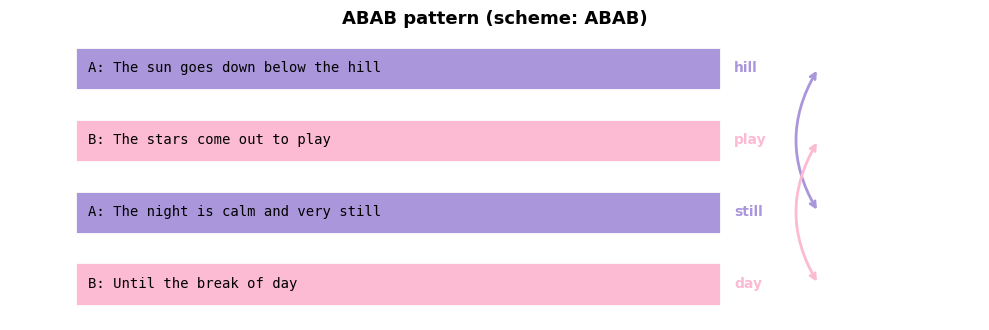

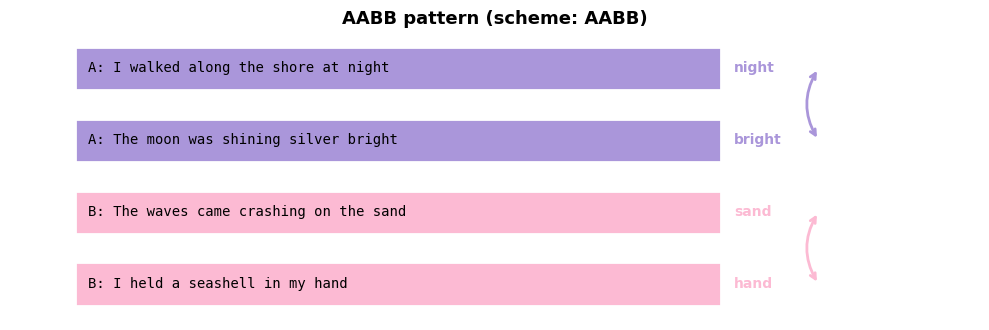

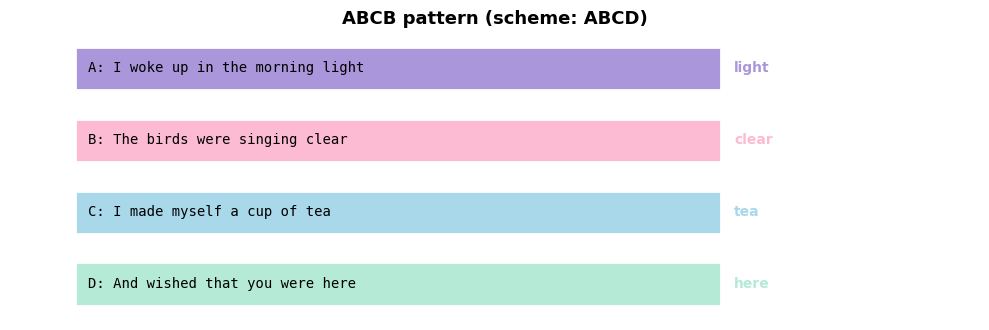

In [4]:
# Visualize rhyme scheme as a color-coded map

def plot_rhyme_scheme(lines: list[str], title: str = "Rhyme Scheme") -> None:
    """Visualize the rhyme scheme of a set of lines."""
    scheme = detect_rhyme_scheme(lines)
    unique_letters = sorted(set(scheme))
    
    # Color palette for rhyme groups
    colors = ["#AA96DA", "#FCBAD3", "#A8D8EA", "#B5EAD7", "#FFFFD2", "#FFB7B2"]
    letter_to_color = {letter: colors[i % len(colors)] for i, letter in enumerate(unique_letters)}
    
    fig, ax = plt.subplots(figsize=(10, len(lines) * 0.6 + 1))
    
    for i, (line, letter) in enumerate(zip(lines, scheme)):
        y = len(lines) - 1 - i  # top to bottom
        color = letter_to_color[letter]
        
        # Draw colored bar
        ax.barh(y, 1, height=0.6, color=color, edgecolor="white", linewidth=2)
        
        # Label
        last_word = line.strip().split()[-1]
        ax.text(0.02, y, f"{letter}: {line}", va="center", fontsize=10, fontfamily="monospace")
        ax.text(1.02, y, last_word, va="center", fontsize=10, fontweight="bold", color=color)
    
    # Draw arcs connecting rhyming lines
    for i in range(len(scheme)):
        for j in range(i + 1, len(scheme)):
            if scheme[i] == scheme[j]:
                yi = len(lines) - 1 - i
                yj = len(lines) - 1 - j
                mid = (yi + yj) / 2
                ax.annotate("", xy=(1.15, yj), xytext=(1.15, yi),
                           arrowprops=dict(arrowstyle="<->", color=letter_to_color[scheme[i]],
                                          lw=2, connectionstyle="arc3,rad=0.3"))
    
    ax.set_xlim(-0.1, 1.4)
    ax.set_ylim(-0.5, len(lines) - 0.5)
    ax.axis("off")
    ax.set_title(f"{title} (scheme: {scheme})", fontsize=13, fontweight="bold")
    plt.tight_layout()
    plt.show()

# Visualize our example verses
for label, lines in verses.items():
    plot_rhyme_scheme(lines, title=label)

## Lyric Structure Analysis

A well-structured song has consistent patterns across its sections. Let's build a complete lyric analyzer that checks:

1. Syllable consistency between verses
2. Rhyme scheme consistency
3. Line count per section

In [5]:
# Complete lyric structure analysis

sample_song: dict[str, list[str]] = {
    "Verse 1": [
        "Walking down the empty street at night",
        "Shadows dancing in the pale moonlight",
        "Every step I take just leads me home",
        "Every breath reminds me I'm alone",
    ],
    "Chorus": [
        "But the stars are calling out my name",
        "And nothing here will ever be the same",
    ],
    "Verse 2": [
        "Memories are flooding through my mind",
        "Searching for the peace I cannot find",
        "Every word you said still echoes clear",
        "Every song we loved still lingers here",
    ],
    "Bridge": [
        "Maybe tomorrow brings a change",
        "Maybe the world won't feel so strange",
    ],
}

print("=== LYRIC STRUCTURE ANALYSIS ===")
print()
for section, lines in sample_song.items():
    scheme = detect_rhyme_scheme(lines)
    syllables = [count_line_syllables(line) for line in lines]
    
    print(f"--- {section} ---")
    print(f"  Lines: {len(lines)}")
    print(f"  Rhyme scheme: {scheme}")
    print(f"  Syllables per line: {syllables}")
    print(f"  Avg syllables: {np.mean(syllables):.1f}")
    print(f"  Syllable range: {min(syllables)}-{max(syllables)}")
    print()
    for i, line in enumerate(lines):
        syl = syllables[i]
        print(f"    {scheme[i]} ({syl:2d} syl): {line}")
    print()

# Compare verse consistency
v1_syl = [count_line_syllables(l) for l in sample_song["Verse 1"]]
v2_syl = [count_line_syllables(l) for l in sample_song["Verse 2"]]
print("Verse consistency check:")
print(f"  Verse 1 syllables: {v1_syl}")
print(f"  Verse 2 syllables: {v2_syl}")
diff = [abs(a - b) for a, b in zip(v1_syl, v2_syl)]
print(f"  Differences:       {diff}")
print(f"  Avg difference:    {np.mean(diff):.1f} syllables")

=== LYRIC STRUCTURE ANALYSIS ===

--- Verse 1 ---
  Lines: 4
  Rhyme scheme: AABC
  Syllables per line: [9, 9, 10, 10]
  Avg syllables: 9.5
  Syllable range: 9-10

    A ( 9 syl): Walking down the empty street at night
    A ( 9 syl): Shadows dancing in the pale moonlight
    B (10 syl): Every step I take just leads me home
    C (10 syl): Every breath reminds me I'm alone

--- Chorus ---
  Lines: 2
  Rhyme scheme: AA
  Syllables per line: [9, 10]
  Avg syllables: 9.5
  Syllable range: 9-10

    A ( 9 syl): But the stars are calling out my name
    A (10 syl): And nothing here will ever be the same

--- Verse 2 ---
  Lines: 4
  Rhyme scheme: AABC
  Syllables per line: [9, 9, 10, 11]
  Avg syllables: 9.8
  Syllable range: 9-11

    A ( 9 syl): Memories are flooding through my mind
    A ( 9 syl): Searching for the peace I cannot find
    B (10 syl): Every word you said still echoes clear
    C (11 syl): Every song we loved still lingers here

--- Bridge ---
  Lines: 2
  Rhyme scheme: AA

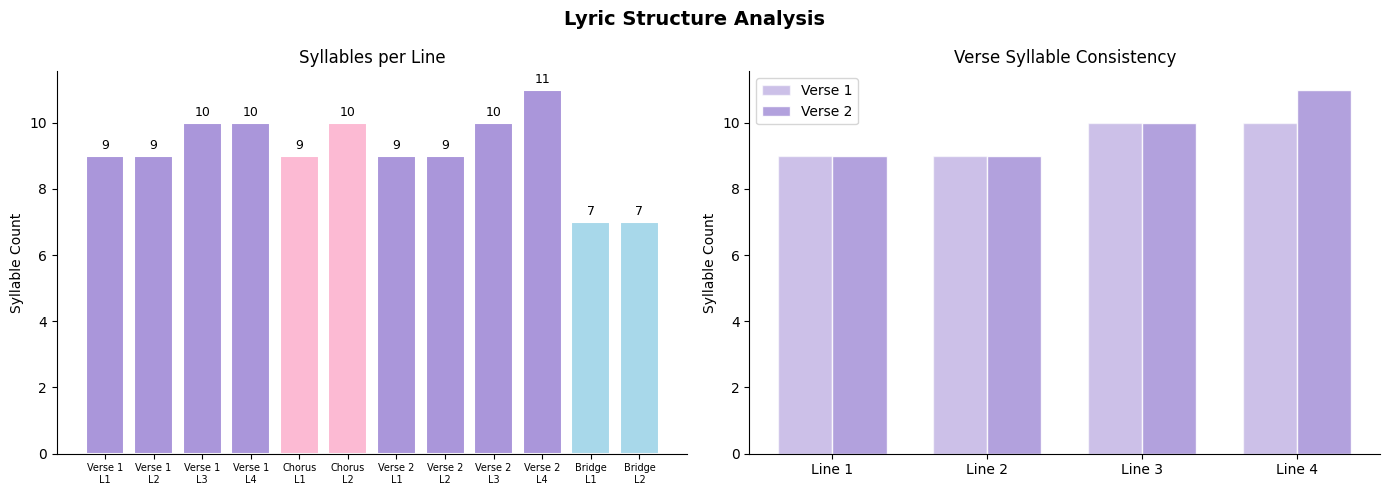

In [6]:
# Comprehensive visualization: syllable counts across all sections

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Lyric Structure Analysis", fontsize=14, fontweight="bold")

section_colors = {
    "Verse 1": "#AA96DA", "Verse 2": "#AA96DA",
    "Chorus": "#FCBAD3", "Bridge": "#A8D8EA",
}

# Left: syllable counts per line, grouped by section
all_syllables = []
all_labels = []
all_colors = []
for section, lines in sample_song.items():
    for i, line in enumerate(lines):
        syl = count_line_syllables(line)
        all_syllables.append(syl)
        all_labels.append(f"{section}\nL{i+1}")
        all_colors.append(section_colors.get(section, "#CCCCCC"))

x = np.arange(len(all_syllables))
ax1.bar(x, all_syllables, color=all_colors, edgecolor="white", linewidth=1.5)
for i, syl in enumerate(all_syllables):
    ax1.text(i, syl + 0.2, str(syl), ha="center", fontsize=9)
ax1.set_xticks(x)
ax1.set_xticklabels(all_labels, fontsize=7)
ax1.set_ylabel("Syllable Count")
ax1.set_title("Syllables per Line")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Right: rhyme scheme comparison between verses
sections_to_compare = ["Verse 1", "Verse 2"]
bar_width = 0.35
for idx, section in enumerate(sections_to_compare):
    lines = sample_song[section]
    syllables = [count_line_syllables(l) for l in lines]
    x_pos = np.arange(len(syllables)) + idx * bar_width
    ax2.bar(x_pos, syllables, bar_width, label=section,
           color=[section_colors[section]], alpha=0.6 + idx * 0.3, edgecolor="white")

ax2.set_xticks(np.arange(len(sample_song["Verse 1"])) + bar_width / 2)
ax2.set_xticklabels([f"Line {i+1}" for i in range(len(sample_song["Verse 1"]))])
ax2.set_ylabel("Syllable Count")
ax2.set_title("Verse Syllable Consistency")
ax2.legend()
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

## Imagery and Concreteness

Great lyrics use **concrete, sensory language** rather than abstract statements. Compare:

- Abstract: "I felt sad and lonely"
- Concrete: "Rain on the window, cold coffee in my cup"

The concrete version *shows* rather than *tells*. Let's build a simple concreteness checker.

In [7]:
# Simple concreteness heuristic based on word categories
# Concrete words reference things you can see, hear, touch, taste, or smell

SENSORY_WORDS: set[str] = {
    # Visual
    "light", "dark", "bright", "shadow", "sun", "moon", "star", "blue",
    "red", "gold", "silver", "shine", "glow", "flash", "color", "black",
    "white", "green", "fire", "flame", "smoke", "sky", "cloud",
    # Auditory
    "sound", "voice", "sing", "whisper", "echo", "thunder", "ring",
    "silence", "loud", "quiet", "song", "music", "beat", "hum",
    # Tactile
    "cold", "warm", "hot", "soft", "rough", "sharp", "smooth", "wet",
    "dry", "touch", "hold", "hand", "skin", "wind", "rain",
    # Taste/Smell
    "sweet", "bitter", "salt", "fresh", "smoke", "perfume",
    # Physical objects
    "door", "window", "street", "road", "river", "ocean", "stone",
    "wall", "bridge", "house", "home", "glass", "mirror", "key",
    "table", "chair", "bed", "floor", "roof", "tree", "flower",
    "cup", "bottle", "car", "train", "ship", "clock",
}

ABSTRACT_WORDS: set[str] = {
    "love", "hope", "dream", "feel", "believe", "think", "know",
    "truth", "beauty", "freedom", "happiness", "sadness", "pain",
    "joy", "fear", "anger", "peace", "soul", "spirit", "destiny",
    "fate", "time", "forever", "always", "never", "everything",
    "nothing", "maybe", "perhaps", "somehow", "somewhere",
}

def concreteness_score(line: str) -> dict[str, float]:
    """Score a line for concreteness vs. abstraction."""
    words = [w.lower().strip(".,!?;:\"'()") for w in line.split()]
    content_words = [w for w in words if len(w) > 2]  # skip short function words
    
    sensory_count = sum(1 for w in content_words if w in SENSORY_WORDS)
    abstract_count = sum(1 for w in content_words if w in ABSTRACT_WORDS)
    total = len(content_words)
    
    return {
        "sensory": sensory_count,
        "abstract": abstract_count,
        "total_content": total,
        "concreteness": sensory_count / total if total > 0 else 0,
    }

# Analyze our sample song
print("Concreteness analysis:")
print(f"{'Line':<50} {'Sensory':<8} {'Abstract':<9} {'Score':<6}")
print("─" * 73)
for section, lines in sample_song.items():
    for line in lines:
        score = concreteness_score(line)
        print(f"{line:<50} {score['sensory']:<8} {score['abstract']:<9} {score['concreteness']:.2f}")

Concreteness analysis:
Line                                               Sensory  Abstract  Score 
─────────────────────────────────────────────────────────────────────────
Walking down the empty street at night             1        0         0.17
Shadows dancing in the pale moonlight              0        0         0.00
Every step I take just leads me home               1        0         0.17
Every breath reminds me I'm alone                  0        0         0.00
But the stars are calling out my name              0        0         0.00
And nothing here will ever be the same             0        1         0.00
Memories are flooding through my mind              0        0         0.00
Searching for the peace I cannot find              0        1         0.00
Every word you said still echoes clear             0        0         0.00
Every song we loved still lingers here             1        0         0.17
Maybe tomorrow brings a change                     0        1         0.00
M

## Exercises

1. **Write a verse**: Write a 4-line verse with an ABAB rhyme scheme. Use `detect_rhyme_scheme` to verify.
2. **Syllable matching**: Write two verses for the same melody. Check that their syllable counts match within 1 syllable per line.
3. **Rhyme exploration**: Use `find_rhymes` to find rhymes for a word you are stuck on. Write a couplet using one of the results.
4. **Concrete rewrite**: Take an abstract line like "I feel so much love" and rewrite it with sensory detail. Check with `concreteness_score`.

---

## What's Next

We now have all the raw materials: structure (Chapter 1), melody (Chapter 2), harmony (Chapter 3), rhythm (Chapter 4), and lyrics (this chapter). In **Chapter 6: Arrangement**, we will learn how to layer these elements together -- deciding what plays when, how dynamics build, and how to create a polished arrangement.